In [1]:
#librerie
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from google.colab import drive
from scipy import integrate

In [18]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_to_file="drive/MyDrive/Lab HPGE/Data not working/Ge1rs.xml"  #change this 



tree = ET.parse(path_to_file) 
root=tree.getroot()

In [3]:
list=[]

#output of the code below: a list of events and each event is a list of 8192 samples  

for event in root.findall("event"):  #this finds all the event in the file
    string_event=event.find("trace").text  #this takes all the samples for each event
    int_event=[int(string_number) for string_number in string_event.split()] #splitting and casting to int
    list.append(int_event)
    #if(len(list)>15000):
    #    break                      this part was useed to manually undersample the Nai_Cesio1.xml file (too big) 

In [4]:
sample_space=10e-9 #10 ns
samples_per_event=len(list[0]) # 8192

evento=90 #pick an event to plot below

x=np.linspace(sample_space,samples_per_event*sample_space,samples_per_event)  # from 10 ns to 8192*10 ns 
z=np.linspace(1,len(list[evento]),num=len(list[evento])) # from 1 to 8192

In [5]:
list_event=np.array(list) # casting to a numpy array

In [63]:
# RUN THIS ONLY FOR NaI and if you want to rotate the plot otherwise just skip this block
background_value_NaI=list_event[0,0] 
list_event-=background_value_NaI             #don't know if this is usefull for the Nai part 
list_event*=(-1)

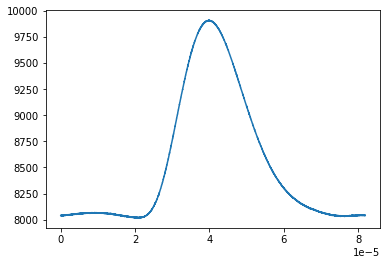

In [6]:
plt.plot(x,list_event[evento])

In [16]:
#integral of each event 
values_integrals=[integrate.trapz(event,x) for event in list]

(0.65, 0.9)

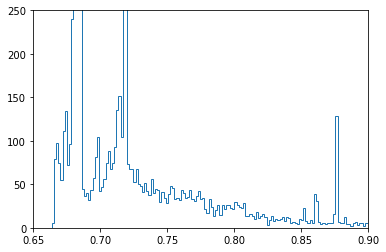

In [18]:
#histogram of the spectrum

numb_bins=500  #try to change this maybe

plt.hist(values_integrals,bins=numb_bins,histtype="step")
plt.ylim(0,250)   #to cut the y axis 
plt.xlim(0.65,0.9)